In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gc

import warnings
warnings.filterwarnings('ignore')

import os
import sys
import urllib.request
import json

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/NanumGothic.ttf").get_name()
rc('font', family=font_name)

In [3]:
xldata = pd.read_html("codefilex.xls", encoding = 'cp949')

In [4]:
df = pd.DataFrame(xldata[0])

In [5]:
header = df.iloc[0]

In [6]:
df = df[1:]

In [7]:
df.rename(columns = header, inplace = True)

In [8]:
df.head(10)

,은행코드,은행명,점포명,전화번호,팩스,우편번호,주소
1,0010003,한국,본부총괄,02 759 4114,02 759 4060,100794,서울특별시 중구 남대문로 ３９
2,0010100,한국,기획국,02 759 4114,02 759 4060,100794,서울특별시 중구 남대문로 ３９
3,0010304,한국,전산정보국,02 560 1114,02 569 9009,135920,서울특별시 강남구 테헤란로 ２０２
4,0010401,한국,총무국,02 759 4114,02 759 5652,100794,서울특별시 중구 남대문로 ３９
5,0010809,한국,조사국,02 759 4114,02 752 0946,100794,서울특별시 중구 남대문로 ３９
6,0010906,한국,경제통계국,02 759 4114,02 759 4340,100794,서울특별시 중구 남대문로 ３９
7,0010935,한국,금융안정분석국,02 759 4114,02 750 6849,100794,서울특별시 중구 남대문로 ３９
8,0011002,한국,금융결제국,02 759 1114,02 750 6660,100794,서울특별시 중구 남대문로 ３９
9,0011109,한국,정책기획국,02 759 4114,02 759 4485,100794,서울특별시 중구 남대문로 ３９
10,0011141,한국,금융시장국,02 759 4114,02 759 4561,100794,서울특별시 중구 남대문로 ３９


In [9]:
df.은행명.unique()

array(['한국', '산업', '기업', '국민', 'ＫＥＢ하나', '수협은행', '수출입', '농협은행', '지역농축협',
       '우리', '신한', 'ＳＣ제일', '한국씨티', '대구', '부산', '광주', '제주', '전북', '경남',
       '새마을금고', '신협', '상호저축은행', 'Ｄ．Ｂ．Ｓ．', 'ＢＢＶＡ은행', '중국농업은행주식유한',
       'Ｂ．Ｏ．Ｃ．', '스테이트스트리트은행', 'Ｓｔａｔｅ\u3000Ｂａｎｋ', '중국광대은행', 'Ｙａｍａｇｕｃｈｉ',
       '바덴뷔르템베르크은행', 'ＢＮＰＰａｒｉｂａｓ', 'ＡＭＥＸ', 'ＩＮＧ\u3000Ｂａｎｋ', 'Ｉ．Ｏ．Ｂ．',
       'Ｕ．Ｏ．Ｂ．', 'ＳＥＰＡＣ', 'Ｎ．Ｂ．Ｃ．', 'Ｂａｒｃｌａｙｓ', 'Ｉ．Ｂ．Ｓ．', 'ＮｏｖａＳｃｏｔｉａ',
       '골드만삭스인터내셔널', '크레디아그리콜뱅크', 'Ｂ．Ｔ．Ｃ．', 'ＭｉｔｓｕｉＳｕｍｉ', 'Ｒ．Ｂ．Ｃ．', 'ＵＢＳ',
       'Ｂ．Ｏ．Ｍ．', 'Ｕ．Ｂ．Ａ．Ｆ．', 'ＭＥＬＬＡＴ', 'ＴＯＫＡＩ', 'Ｓ．Ｇ．Ｂ．', 'ＷＥＳＴＰＡＣ',
       'Ｆ．Ｎ．Ｂ．Ｂ．', 'Ｎ．Ｂ．Ｐ．', 'Ａ．Ｂ．Ｌ．', 'ＡＳＡＨＩ', 'ＭＩＴＳＵＢＩＳＨＩ', '메릴린치인터내셔널',
       '맥쿼리은행', 'Ｂ．Ｏ．Ｈ．', 'ＯＣＢＣ\u3000Ｂａｎｋ', 'ＦＩＣＡＬ', '리먼브러더스', 'Ａ．Ｎ．Ｚ．',
       'ＢＮＹ\u3000ＭＥＬＬＯＮ', 'Ｎ．Ｗ．Ｂ', 'ＤＡＩＷＡ', 'Ｌ．Ｔ．Ｃ．Ｂ．', 'ＭＥＴＲＯＢＡＮＫ',
       '메트로은행', 'ＣｒｅｄｉｔＳｕｉｓ', 'Ｗａｃｈｏｖｉａ', '중국건설은행', '중국교통은행', '모간스탠리',
       'ＨＳＢＣ', '도이치은행', '알비에스피엘씨', 'ＪＰ모간체이스', '미즈호은행', '미쓰비시도쿄ＵＦＪ은',
       'Ｂ．Ｏ．Ａ', '비엔피파리바', '중국공상은행', '중국은행', '산림조합', '대화은행', '우체국',
       '

In [10]:
guest_bank = ['기업','국민','우리','ＳＣ제일','케이뱅크']

## IBK 기업은행 데이터 전처리

In [11]:
df_ibk = df[df.은행명 == '기업']
df_ibk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 188 to 16039
Data columns (total 7 columns):
은행코드    801 non-null object
은행명     801 non-null object
점포명     801 non-null object
전화번호    801 non-null object
팩스      795 non-null object
우편번호    801 non-null object
주소      801 non-null object
dtypes: object(7)
memory usage: 50.1+ KB


In [12]:
df_ibk.head(3)

,은행코드,은행명,점포명,전화번호,팩스,우편번호,주소
188,0030009,기업,본부총괄,02 729 6114,NaN,100758,서울시 중구 을지로２가 ５０
189,0030012,기업,영업부,02 729 6114,0505075 0001,04541,서울특별시 중구 을지로 ７９
190,0030025,기업,동대문（지）,02 745 8751,0505075 0002,03130,서울특별시 종로구 종로 １８９ （종로４가）


In [13]:
code_dict = { "０":"0",
            "１":"1",
            "２":"2",
            "３":"3",
            "４":"4",
            "５":"5",
            "６":"6",
            "７":"7",
            "８":"8",
            "９":"9",
            "　":" "}
code_eng_dict = { 
    'Ａ':'A',
    'Ｂ':'B',
    'Ｃ':'C',
    'Ｄ':'D',
    'Ｅ':'E',
    'Ｆ':'F',
    'Ｇ':'G',
    'Ｈ':'H',
    'Ｉ':'I',
    'Ｊ':'J',
    'Ｋ':'K',
    'Ｌ':'L',
    'Ｍ':'M',
    'Ｎ':'N',
    'Ｏ':'O',
    'Ｐ':'P',
    'Ｑ':'Q',
    'Ｒ':'R',
    'Ｓ':'S',
    'Ｔ':'T',
    'Ｕ':'U',
    'Ｖ':'V',
    'Ｗ':'W',
    'Ｘ':'X',
    'Ｙ':'Y',
    'Ｚ':'Z' }

In [14]:
df_ibk['주소_변환'] = df_ibk.주소.apply(lambda x : x)
df_ibk['주소_변환'] = df_ibk.주소_변환.apply(lambda x: x.replace('０', '0')
                                     .replace('１', '1')
                                     .replace('２', '2')
                                     .replace('３', '3')
                                     .replace('４', '4')
                                     .replace('５', '5')
                                     .replace('６', '6')
                                     .replace('７', '7')
                                     .replace('８', '8')
                                     .replace('９', '9')
                                     .replace('\u3000', ' ')
                                    .replace('（','(')
                                    .replace('）',')')
                                    )

In [15]:
gc.collect()

0

In [16]:
df_ibk.drop(['주소','전화번호','팩스','우편번호'], axis = 1, inplace = True)

In [17]:
df_ibk.head()

,은행코드,은행명,점포명,주소_변환
188,0030009,기업,본부총괄,서울시 중구 을지로2가 50
189,0030012,기업,영업부,서울특별시 중구 을지로 79
190,0030025,기업,동대문（지）,서울특별시 종로구 종로 189 (종로4가)
191,0030038,기업,상계역（지）,서울특별시 노원구 덕릉로 690
192,0030041,기업,수유동（지）,서울특별시 강북구 삼양로 511


## SC제일은행 데이터 전처리

In [18]:
df_SC = df[df.은행명 == 'ＳＣ제일']
df_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 12548 to 12910
Data columns (total 7 columns):
은행코드    363 non-null object
은행명     363 non-null object
점포명     363 non-null object
전화번호    363 non-null object
팩스      363 non-null object
우편번호    363 non-null object
주소      363 non-null object
dtypes: object(7)
memory usage: 22.7+ KB


In [19]:
df_SC.head(3)

,은행코드,은행명,점포명,전화번호,팩스,우편번호,주소
12548,0230003,ＳＣ제일,본부총괄,02 733 3114,0 0 0,110702,서울 종로구공평동１００
12549,0230016,ＳＣ제일,임원실,02 37023114,0 0 0,110702,서울 종로구공평동１００
12550,0230029,ＳＣ제일,은행공통경비점,02 37023114,02 37020000,03160,서울특별시 종로구 종로 ４７ ＳＣ은행


In [20]:
code_eng_dict = { 
    'Ａ':'A',
    'Ｂ':'B',
    'Ｃ':'C',
    'Ｄ':'D',
    'Ｅ':'E',
    'Ｆ':'F',
    'Ｇ':'G',
    'Ｈ':'H',
    'Ｉ':'I',
    'Ｊ':'J',
    'Ｋ':'K',
    'Ｌ':'L',
    'Ｍ':'M',
    'Ｎ':'N',
    'Ｏ':'O',
    'Ｐ':'P',
    'Ｑ':'Q',
    'Ｒ':'R',
    'Ｓ':'S',
    'Ｔ':'T',
    'Ｕ':'U',
    'Ｖ':'V',
    'Ｗ':'W',
    'Ｘ':'X',
    'Ｙ':'Y',
    'Ｚ':'Z' }

In [21]:
df_SC['주소_변환'] = df_SC.주소.apply(lambda x : x)
df_SC['주소_변환'] = df_SC.주소_변환.apply(lambda x: x.replace('０', '0')
                                     .replace('１', '1')
                                     .replace('２', '2')
                                     .replace('３', '3')
                                     .replace('４', '4')
                                     .replace('５', '5')
                                     .replace('６', '6')
                                     .replace('７', '7')
                                     .replace('８', '8')
                                     .replace('９', '9')
                                     .replace('\u3000', ' ')
                                    .replace('（','(')
                                    .replace('）',')')
                                    )
df_SC['주소_변환'] = df_SC.주소_변환.apply(lambda x: 
                                   x.replace('Ａ', 'A')
                                   .replace('Ｂ', 'B')
                                   .replace('Ｃ', 'C')
                                   .replace('Ｄ', 'D')
                                   .replace('Ｅ', 'E')
                                   .replace('Ｆ', 'F')
                                   .replace('Ｇ', 'G')
                                   .replace('Ｈ', 'H')
                                   .replace('Ｉ', 'I')
                                   .replace('Ｊ', 'J')
                                   .replace('Ｋ', 'K')
                                   .replace('Ｌ', 'L')
                                   .replace('Ｍ', 'M')
                                   .replace('Ｎ', 'N')
                                   .replace('Ｏ', 'O')
                                   .replace('Ｐ', 'P')
                                   .replace('Ｑ', 'Q')
                                   .replace('Ｒ', 'R')
                                   .replace('Ｓ', 'S')
                                   .replace('Ｔ', 'T')
                                   .replace('Ｕ', 'U')
                                   .replace('Ｖ', 'V')
                                   .replace('Ｗ', 'W')
                                   .replace('Ｘ', 'X')
                                   .replace('Ｙ', 'Y')
                                   .replace('Ｚ', 'Z')
                                  )

In [22]:
df_SC.drop(['주소','전화번호','팩스','우편번호'], axis = 1, inplace = True)

In [23]:
df_SC.head(3)

,은행코드,은행명,점포명,주소_변환
12548,0230003,ＳＣ제일,본부총괄,서울 종로구공평동100
12549,0230016,ＳＣ제일,임원실,서울 종로구공평동100
12550,0230029,ＳＣ제일,은행공통경비점,서울특별시 종로구 종로 47 SC은행


## 국민은행 데이터 전처리

In [24]:
df_kb = df[df.은행명 == '국민']
df_kb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 988 to 23900
Data columns (total 7 columns):
은행코드    1721 non-null object
은행명     1721 non-null object
점포명     1721 non-null object
전화번호    1721 non-null object
팩스      1721 non-null object
우편번호    1721 non-null object
주소      1721 non-null object
dtypes: object(7)
memory usage: 107.6+ KB


In [25]:
df_kb.head(3)

,은행코드,은행명,점포명,전화번호,팩스,우편번호,주소
988,0040015,국민,명동영업부,02 20737114,02 20732214,04534,서울 중구 남대문로 ８４， 국민은행명동본점 （남대문로２가）
989,0040028,국민,남대문종합금융센터,02 777 8171,02 310 5410,04526,서울 중구 세종대로 ５０ （남대문로４가）
990,0040031,국민,중부,02 22662183,02 22720598,04555,서울 중구 충무로 ２９ （초동）


In [26]:
df_kb['주소_변환'] = df_kb.주소.apply(lambda x : x)
df_kb['주소_변환'] = df_kb.주소_변환.apply(lambda x: x.replace('０', '0')
                                     .replace('１', '1')
                                     .replace('２', '2')
                                     .replace('３', '3')
                                     .replace('４', '4')
                                     .replace('５', '5')
                                     .replace('６', '6')
                                     .replace('７', '7')
                                     .replace('８', '8')
                                     .replace('９', '9')
                                     .replace('\u3000', ' ')
                                    .replace('（','(')
                                    .replace('）',')')
                                    )
df_kb['주소_변환'] = df_kb.주소_변환.apply(lambda x: 
                                   x.replace('Ａ', 'A')
                                   .replace('Ｂ', 'B')
                                   .replace('Ｃ', 'C')
                                   .replace('Ｄ', 'D')
                                   .replace('Ｅ', 'E')
                                   .replace('Ｆ', 'F')
                                   .replace('Ｇ', 'G')
                                   .replace('Ｈ', 'H')
                                   .replace('Ｉ', 'I')
                                   .replace('Ｊ', 'J')
                                   .replace('Ｋ', 'K')
                                   .replace('Ｌ', 'L')
                                   .replace('Ｍ', 'M')
                                   .replace('Ｎ', 'N')
                                   .replace('Ｏ', 'O')
                                   .replace('Ｐ', 'P')
                                   .replace('Ｑ', 'Q')
                                   .replace('Ｒ', 'R')
                                   .replace('Ｓ', 'S')
                                   .replace('Ｔ', 'T')
                                   .replace('Ｕ', 'U')
                                   .replace('Ｖ', 'V')
                                   .replace('Ｗ', 'W')
                                   .replace('Ｘ', 'X')
                                   .replace('Ｙ', 'Y')
                                   .replace('Ｚ', 'Z')
                                  )

In [27]:
df_kb.drop(['주소','전화번호','팩스','우편번호'], axis = 1, inplace = True)

In [28]:
df_kb.head(3)

,은행코드,은행명,점포명,주소_변환
988,0040015,국민,명동영업부,서울 중구 남대문로 84， 국민은행명동본점 (남대문로2가)
989,0040028,국민,남대문종합금융센터,서울 중구 세종대로 50 (남대문로4가)
990,0040031,국민,중부,서울 중구 충무로 29 (초동)


## 우리은행 데이터 전처리

In [29]:
df_wri = df[df.은행명 == '우리']
df_wri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 11191 to 25314
Data columns (total 7 columns):
은행코드    1126 non-null object
은행명     1126 non-null object
점포명     1126 non-null object
전화번호    1126 non-null object
팩스      1084 non-null object
우편번호    1111 non-null object
주소      1126 non-null object
dtypes: object(7)
memory usage: 70.4+ KB


In [30]:
df_wri.head(3)

,은행코드,은행명,점포명,전화번호,팩스,우편번호,주소
11191,0200017,우리,영업부,02 20023000,0505001 3002,100792,서울특별시 중구 소공로 ５１
11192,0200020,우리,부산지역센터,051 806 9470,NaN,614032,부산 부산진구 부전２동 ２５４－１
11193,0200046,우리,명동금융센터,02 774 4011,02 756 0897,100809,서울특별시 중구 명동길 ４２


In [31]:
df_wri['주소_변환'] = df_wri.주소.apply(lambda x : x)
df_wri['주소_변환'] = df_wri.주소_변환.apply(lambda x: x.replace('０', '0')
                                     .replace('１', '1')
                                     .replace('２', '2')
                                     .replace('３', '3')
                                     .replace('４', '4')
                                     .replace('５', '5')
                                     .replace('６', '6')
                                     .replace('７', '7')
                                     .replace('８', '8')
                                     .replace('９', '9')
                                     .replace('\u3000', ' ')
                                    .replace('（','(')
                                    .replace('）',')')
                                    )
df_wri['주소_변환'] = df_wri.주소_변환.apply(lambda x: 
                                   x.replace('Ａ', 'A')
                                   .replace('Ｂ', 'B')
                                   .replace('Ｃ', 'C')
                                   .replace('Ｄ', 'D')
                                   .replace('Ｅ', 'E')
                                   .replace('Ｆ', 'F')
                                   .replace('Ｇ', 'G')
                                   .replace('Ｈ', 'H')
                                   .replace('Ｉ', 'I')
                                   .replace('Ｊ', 'J')
                                   .replace('Ｋ', 'K')
                                   .replace('Ｌ', 'L')
                                   .replace('Ｍ', 'M')
                                   .replace('Ｎ', 'N')
                                   .replace('Ｏ', 'O')
                                   .replace('Ｐ', 'P')
                                   .replace('Ｑ', 'Q')
                                   .replace('Ｒ', 'R')
                                   .replace('Ｓ', 'S')
                                   .replace('Ｔ', 'T')
                                   .replace('Ｕ', 'U')
                                   .replace('Ｖ', 'V')
                                   .replace('Ｗ', 'W')
                                   .replace('Ｘ', 'X')
                                   .replace('Ｙ', 'Y')
                                   .replace('Ｚ', 'Z')
                                  )

In [32]:
df_wri.drop(['주소','전화번호','팩스','우편번호'], axis = 1, inplace = True)

In [33]:
df_wri.head()

,은행코드,은행명,점포명,주소_변환
11191,0200017,우리,영업부,서울특별시 중구 소공로 51
11192,0200020,우리,부산지역센터,부산 부산진구 부전2동 254－1
11193,0200046,우리,명동금융센터,서울특별시 중구 명동길 42
11194,0200059,우리,중부금융센터,서울특별시 중구 수표로 34 (저동2가， 쌍용빌딩)
11195,0200062,우리,소공동,서울특별시 중구 남대문로 63


## 은행 데이터 통합

In [42]:
df_bank = df_ibk.append(df_SC, ignore_index = True)
df_bank = df_bank.append(df_kb, ignore_index = True)
df_bank = df_bank.append(df_wri, ignore_index = True)

In [43]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 4 columns):
은행코드     4011 non-null object
은행명      4011 non-null object
점포명      4011 non-null object
주소_변환    4011 non-null object
dtypes: object(4)
memory usage: 125.4+ KB


In [36]:
df_bank.은행명.unique()

array(['기업', 'ＳＣ제일', '국민', '우리'], dtype=object)

In [37]:
df_bank.은행명.value_counts()

국민      1721
우리      1126
기업       801
ＳＣ제일     363
Name: 은행명, dtype: int64

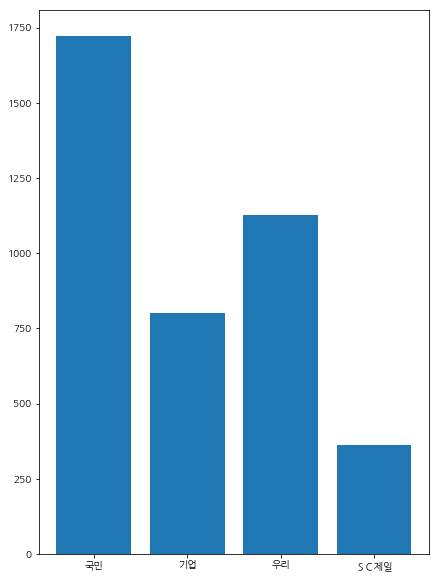

In [38]:
plt.figure(figsize = (7,10))
plt.bar(x = df_bank.은행명.value_counts().index,
       height = df_bank.은행명.value_counts().values)
plt.show()

## 네이버 API를 통해서 정확한 주소 및 좌표 검색

In [39]:
client_id = "******"
client_secret = "******"

In [40]:
def address_to_axis(address):
    encText = urllib.parse.quote(address)
    url = "https://openapi.naver.com/v1/map/geocode?query=" + encText # json 결과

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    if(rescode==200):
        data_info = json.load(response)
        address_info = data_info['result']['items'][0]['address']
        axis_x = data_info['result']['items'][0]['point']['x']
        axis_y = data_info['result']['items'][0]['point']['y']
        
    else:
        address_info = 'ERROR_CODE'
        axis_x = 'ERROR_CODE'
        axis_y = 'ERROR_CODE'
        
    return (address_info, axis_x, axis_y)

In [74]:
df_bank_temp = pd.DataFrame(columns = ['주소', 'x_axis', 'y_axis'])

for _ in df_bank.주소_변환:
    try:
        add_info, x_ax, y_ax = address_to_axis(_)
    except:
        add_info, x_ax, y_ax = ('ERROR_CODE', 'ERROR_CODE', 'ERROR_CODE')
    df_bank_temp = df_bank_temp.append({'주소': add_info, 'x_axis':x_ax, 'y_axis':y_ax}, ignore_index = True)

gc.collect()

df_bank_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 3 columns):
주소        4011 non-null object
x_axis    4011 non-null object
y_axis    4011 non-null object
dtypes: object(3)
memory usage: 94.1+ KB


In [75]:
df_bank_temp.head()

,주소,x_axis,y_axis
0,서울특별시 중구 을지로2가 50,126.987,37.5665
1,서울특별시 중구 을지로 79 기업은행,126.987,37.5665
2,서울특별시 종로구 종로 189 IBK기업은행,126.999,37.5711
3,서울특별시 노원구 덕릉로 690 기업은행,127.076,37.6592
4,서울특별시 강북구 삼양로 511 기업은행,127.014,37.6487


In [86]:
df_merged = pd.merge(df_bank.reset_index(), df_bank_temp.reset_index(), on = 'index', how = 'left')

In [94]:
# 1차 전처리 완료
# ERROR_CODE는 regrex로 해결하기

df_merged.to_csv("preprocess_data_bank.csv", index = False, encoding = 'cp949')